# Data visualization on dataset "Taxis"

The dataset contains taxi trips in New York City in 2019. Detailed description on the [website.](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page)

Columns containing the data set:
- `pickup' - the start time of the trip
- `dropoff' - trip end time
- `passengers' - the number of passengers on the trip
- `distance' - the distance of the trip
- `fare' - the basic fare for the trip
- `tip' - tip size
- `tolls' - payment for toll roads (the passenger also pays for this)
- `total' - total fare for the trip
- `color' - the color of the car that made the trip
- `payment' - payment method
- `pickup_zone' - the zone where the trip started
- `dropoff_zone` - the zone in which the trip ended
- `pickup_borough' - the district where the trip started
- `dropoff_borough' - the district where the trip ended

0.Import the matplotlib.pyplot, seaborn and pandas libraries.

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

Let's load our data

In [4]:
df_taxi = sns.load_dataset('taxis')

List of first five rows

In [5]:
df_taxi[:5]

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


Check the columns and their corresponding data types

In [10]:
df_taxi.dtypes

pickup             datetime64[ns]
dropoff            datetime64[ns]
passengers                  int64
distance                  float64
fare                      float64
tip                       float64
tolls                     float64
total                     float64
color                      object
payment                    object
pickup_zone                object
dropoff_zone               object
pickup_borough             object
dropoff_borough            object
dtype: object

In [7]:
#shape
df_taxi.shape

(6433, 14)

Let's check if there are any missing values in this data set.

In [8]:
df_taxi.isna().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

**Why are there multiple columns of missing data in these rows?**
One of the reasons may be that the driver entered the data incorrectly, we can see that the data is missing mainly in the pick up and dropoff zones

**Why are there lines with distance==0 and total!=0?**
The first thing that came to mind is when a taxi picks up a passenger on the street without prior order and enters the data manually, so it is possible that the program cannot read the distance and puts a 0 value in distance. Total is not 0 because the driver can enter the price of the trip.
We can also see that there are lines where the pick up and dropoff zone are the same, which indicates that one of the addresses is wrong and therefore the distance value is zero

In [10]:
# the column with the maximum number of missing values
column_with_max_nulls = df_taxi.isnull().sum().idxmax()

# rows where this column has missing values
rows_with_nulls = df_taxi[df_taxi[column_with_max_nulls].isnull()]
print(rows_with_nulls)

                  pickup             dropoff  passengers  distance   fare  \
42   2019-03-30 23:59:14 2019-03-30 23:59:17           1      0.00   80.0   
622  2019-03-12 19:52:36 2019-03-12 19:52:55           3      0.00  120.0   
711  2019-03-21 17:39:50 2019-03-21 18:12:54           2      1.74   17.0   
739  2019-03-14 00:09:17 2019-03-14 00:09:21           1      0.03    2.5   
970  2019-03-29 00:02:00 2019-03-29 00:02:05           2      0.00   45.0   
1108 2019-03-10 09:33:13 2019-03-10 09:52:04           1     13.40   52.0   
1112 2019-03-12 19:09:23 2019-03-12 19:20:46           1      0.90    8.5   
1230 2019-03-29 07:52:46 2019-03-29 08:02:40           1      0.90    5.5   
1690 2019-03-22 06:24:14 2019-03-22 06:24:14           1      0.00   72.0   
1787 2019-03-28 06:58:57 2019-03-28 07:18:10           1      6.32   20.5   
2089 2019-03-12 16:21:28 2019-03-12 16:43:40           1      5.69   21.0   
2137 2019-03-08 13:27:32 2019-03-08 13:46:23           1      1.40   12.0   

In [12]:
# rows where distance==0 and total!=0
rows_distance_zero = df_taxi[(df_taxi['distance'] == 0) & (df_taxi['total'] != 0)]
print(rows_distance_zero)

                  pickup             dropoff  passengers  distance   fare  \
42   2019-03-30 23:59:14 2019-03-30 23:59:17           1       0.0   80.0   
120  2019-03-21 17:21:44 2019-03-21 17:21:49           1       0.0    2.5   
622  2019-03-12 19:52:36 2019-03-12 19:52:55           3       0.0  120.0   
670  2019-03-08 04:50:48 2019-03-08 04:51:07           1       0.0    2.5   
970  2019-03-29 00:02:00 2019-03-29 00:02:05           2       0.0   45.0   
1080 2019-03-04 14:17:05 2019-03-04 14:17:13           1       0.0    2.5   
1207 2019-03-08 15:41:20 2019-03-08 15:41:23           1       0.0    2.5   
1482 2019-03-10 20:27:25 2019-03-10 20:28:33           1       0.0   52.0   
1690 2019-03-22 06:24:14 2019-03-22 06:24:14           1       0.0   72.0   
1910 2019-03-25 14:37:56 2019-03-25 14:38:22           1       0.0    2.5   
1929 2019-03-13 22:35:35 2019-03-13 22:35:49           1       0.0    2.5   
2398 2019-03-26 21:20:48 2019-03-26 21:29:46           1       0.0    7.5   

Fill in the blank values. Since all columns of the data set have missing values in rows with data type string, let's fill the missing values with the string 'NA'.
Let's create a data set 'df_taxi_clean', which contains 'df_taxiє' data with missing values in all columns (where those values are missing) filled with 'NA'.
In the future, we will use 'df_taxi_clean'.

In [13]:
df_taxi_clean = df_taxi.fillna('NA')

In [10]:
df_taxi_clean.isna().sum()

pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        0
dropoff_zone       0
pickup_borough     0
dropoff_borough    0
dtype: int64

**Convert the pickup column to datetime64[ns] format**

In [14]:
df_taxi_clean['pickup'] = pd.to_datetime(df_taxi_clean['pickup'])

print(df_taxi_clean.head())

               pickup             dropoff  passengers  distance  fare   tip  \
0 2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0  2.15   
1 2019-03-04 16:11:55 2019-03-04 16:19:00           1      0.79   5.0  0.00   
2 2019-03-27 17:53:01 2019-03-27 18:00:25           1      1.37   7.5  2.36   
3 2019-03-10 01:23:59 2019-03-10 01:49:51           1      7.70  27.0  6.15   
4 2019-03-30 13:27:42 2019-03-30 13:37:14           3      2.16   9.0  1.10   

   tolls  total   color      payment            pickup_zone  \
0    0.0  12.95  yellow  credit card        Lenox Hill West   
1    0.0   9.30  yellow         cash  Upper West Side South   
2    0.0  14.16  yellow  credit card          Alphabet City   
3    0.0  36.95  yellow  credit card              Hudson Sq   
4    0.0  13.40  yellow  credit card           Midtown East   

            dropoff_zone pickup_borough dropoff_borough  
0    UN/Turtle Bay South      Manhattan       Manhattan  
1  Upper West Side South      

In [12]:
df_taxi_clean.dtypes

pickup             datetime64[ns]
dropoff            datetime64[ns]
passengers                  int64
distance                  float64
fare                      float64
tip                       float64
tolls                     float64
total                     float64
color                      object
payment                    object
pickup_zone                object
dropoff_zone               object
pickup_borough             object
dropoff_borough            object
dtype: object

Let's check datatype in colomn 'pickup'

In [15]:
df_taxi_clean.pickup.head(3)

0   2019-03-23 20:21:09
1   2019-03-04 16:11:55
2   2019-03-27 17:53:01
Name: pickup, dtype: datetime64[ns]

Our pickup column now contains data in date-time format. I will take my time and do an analysis by day.

In [16]:
df_taxi_clean['pickup_day'] = df_taxi_clean.pickup.dt.floor('d')

Group the data by pickup_day and display a schedule of total payments by day.

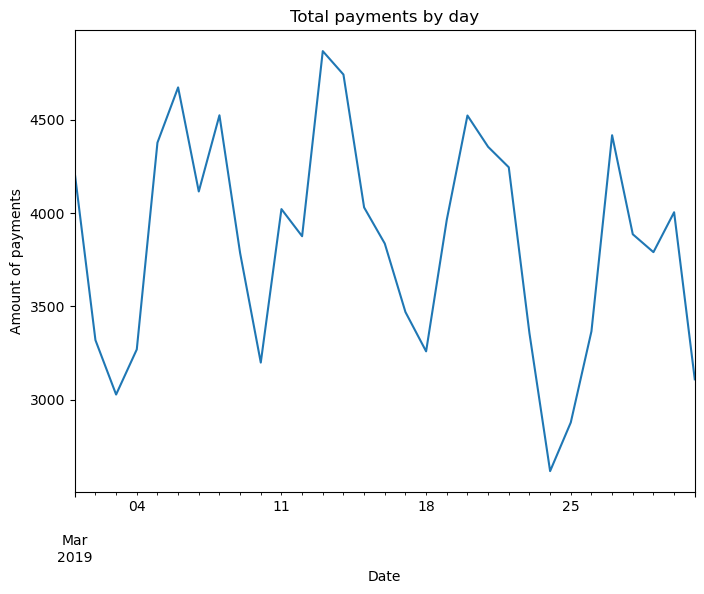

In [22]:
daily_payment = df_taxi_clean.groupby('pickup_day')['total'].sum()

# Let's build a linear graph

daily_payment.plot(figsize=(8, 6))
plt.xlabel('Date')
plt.ylabel('Amount of payments')
plt.title('Total payments by day')
plt.show()

Output the number of rows for each pickup_day.

In [19]:
counts_row_for_each_pickup_day = df_taxi_clean['pickup_day'].value_counts()
counts_row_for_each_pickup_day

pickup_day
2019-03-14    260
2019-03-06    257
2019-03-13    244
2019-03-01    241
2019-03-08    235
2019-03-20    233
2019-03-27    232
2019-03-22    229
2019-03-05    228
2019-03-21    221
2019-03-16    220
2019-03-12    218
2019-03-07    218
2019-03-30    215
2019-03-11    209
2019-03-29    209
2019-03-23    209
2019-03-28    205
2019-03-09    204
2019-03-15    201
2019-03-19    201
2019-03-02    198
2019-03-31    187
2019-03-10    185
2019-03-17    178
2019-03-26    178
2019-03-18    173
2019-03-04    171
2019-03-03    169
2019-03-25    155
2019-03-24    149
2019-02-28      1
Name: count, dtype: int64

We see that there is only one row for the date 2019-02-28. This is an entry that seems to have gotten here by accident, let's remove the row containing pickup_day equal to 2019-02-28 from the df_taxi_clean dataset.

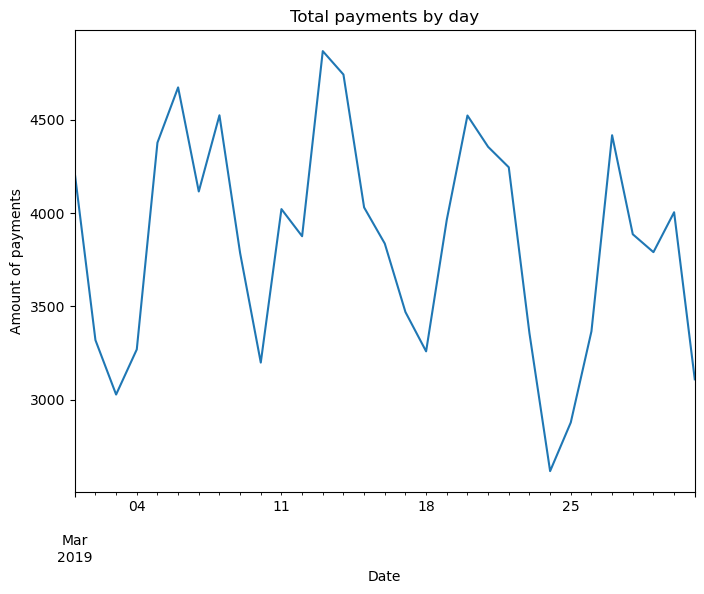

In [21]:
df_taxi_clean = df_taxi_clean[df_taxi_clean['pickup_day'] != '2019-02-28']
df_taxi_clean
daily_payment = df_taxi_clean.groupby('pickup_day')['total'].sum()
# Побудуємо графік
daily_payment.plot(figsize=(8, 6))
plt.xlabel('Date')
plt.ylabel('Amount of payments')
plt.title('Total payments by day')
plt.show()

Let's look at the dynamics of total payments by district.

In [23]:
borough_pivot = pd.pivot_table(df_taxi_clean, index='pickup_day', columns='pickup_borough', values='total', aggfunc='sum')
borough_pivot = borough_pivot.drop(columns=['NA'], errors='ignore')

print(borough_pivot)

pickup_borough   Bronx  Brooklyn  Manhattan  Queens
pickup_day                                         
2019-03-01      123.42    353.05    3169.47  553.29
2019-03-02         NaN    146.56    2716.33  456.13
2019-03-03       80.75    407.06    2100.23  428.73
2019-03-04       92.00    188.73    2026.17  962.18
2019-03-05       98.16    558.40    2981.26  739.56
2019-03-06      130.65    198.53    3501.07  833.36
2019-03-07         NaN    440.75    3087.82  587.13
2019-03-08       79.20    237.47    3408.85  780.34
2019-03-09       80.22    187.88    2967.71  511.73
2019-03-10      119.86    160.48    2353.45  494.64
2019-03-11       46.04    254.92    3019.49  697.51
2019-03-12       31.83    158.74    2896.13  623.10
2019-03-13       42.44    287.68    3690.66  837.28
2019-03-14       82.53    255.84    3609.49  794.69
2019-03-15       94.32    336.91    3051.71  516.99
2019-03-16       34.80    334.22    2763.89  703.67
2019-03-17       64.63    166.92    2430.99  806.96
2019-03-18  

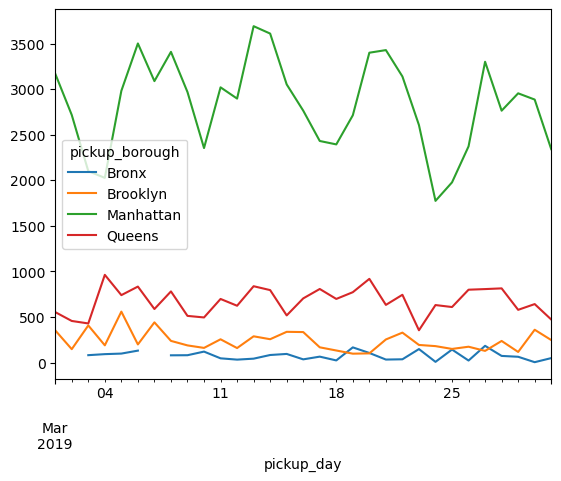

In [24]:
borough_pivot.plot();

Let's build histograms of the amount of daily payments for trips in each of the districts.

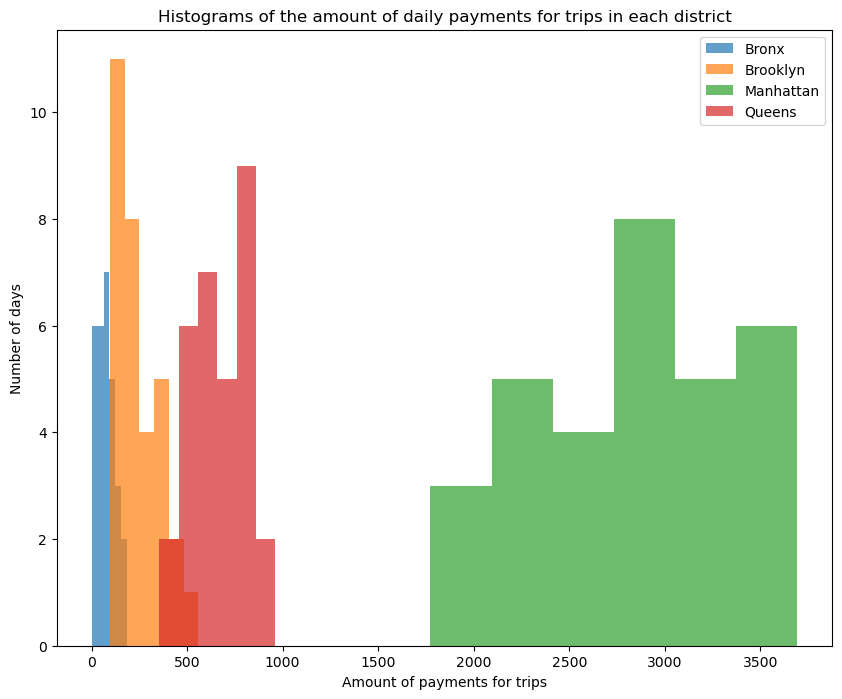

In [26]:
plt.figure(figsize=(10, 8))

for borough in borough_pivot.columns:
    plt.hist(borough_pivot[borough], bins=6, alpha=0.7, label=borough)

plt.xlabel('Amount of payments for trips')
plt.ylabel('Number of days')
plt.title('Histograms of the amount of daily payments for trips in each district')
plt.legend()
plt.show()

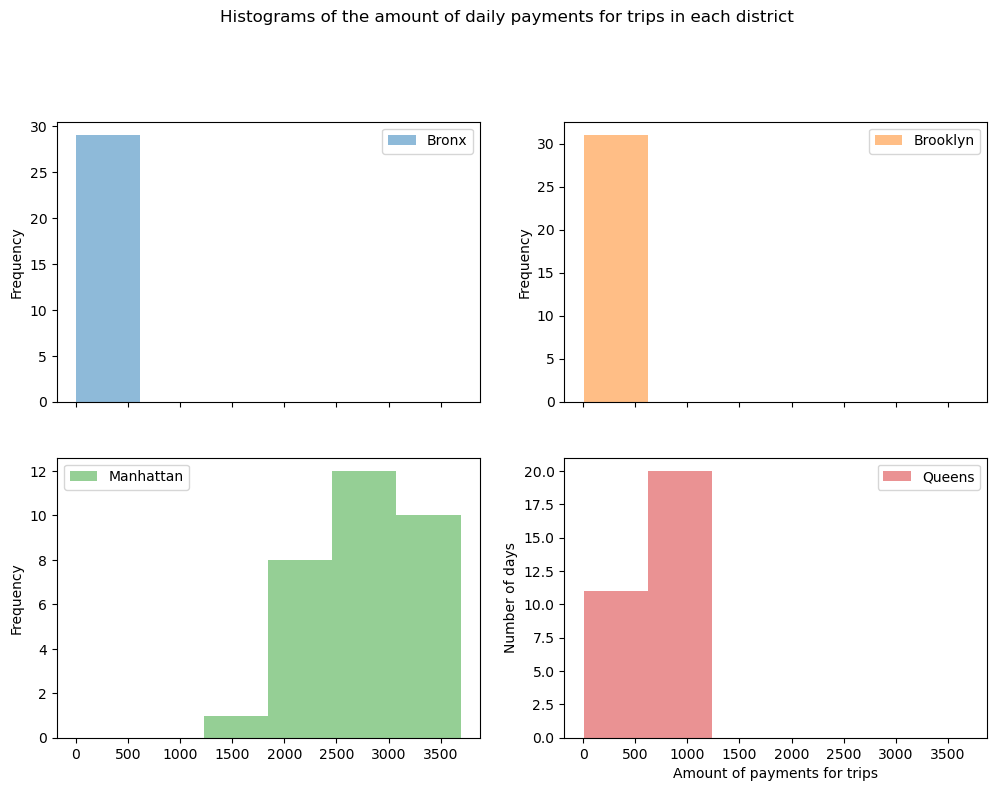

In [27]:
# Let's build histogram graphs for the amount of daily payments for trips in each district
borough_pivot.plot(kind='hist', bins=6, alpha=0.5, figsize=(12, 8), subplots=True, layout=(2, 2), legend=True)
# Adjust labels and header
plt.suptitle('Histograms of the amount of daily payments for trips in each district', y=1.02)
plt.xlabel('Amount of payments for trips')
plt.ylabel('Number of days')

plt.show()

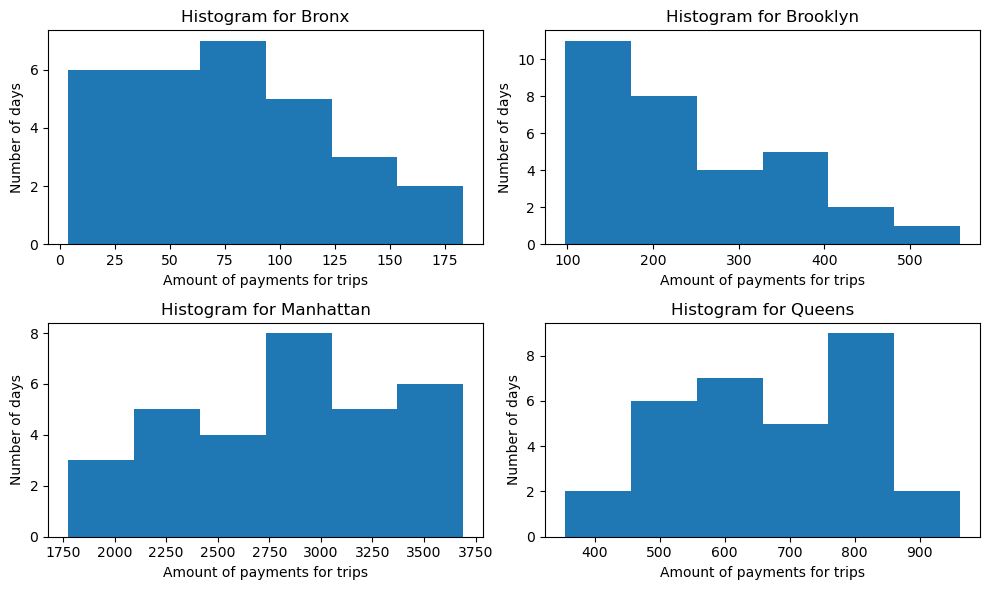

In [29]:
# Let's build 4 histograms on separate shapes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

# We will get a list of unique districts
boroughs = list(borough_pivot.columns)

# Let's build histograms for each district
for i, ax in enumerate(axes.flat):
     borough = boroughs[i]
     ax.hist(borough_pivot[borough], bins=6)
     ax.set_title(f'Histogram for {borough}')
     ax.set_xlabel('Amount of payments for trips')
     ax.set_ylabel('Number of days')

plt.tight_layout()
plt.show()

Let's display 4 histograms on one figure.

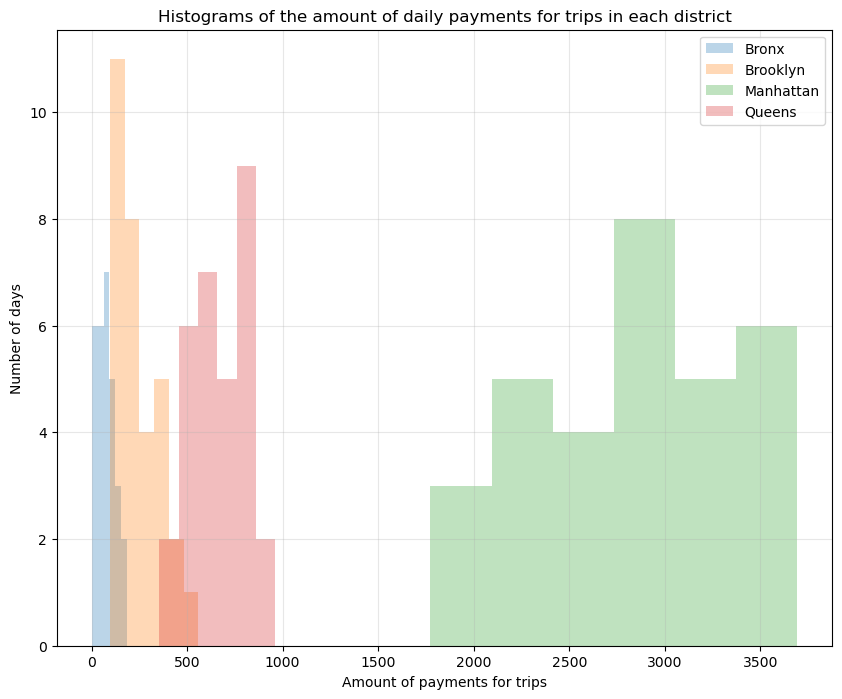

In [30]:
plt.figure(figsize=(10, 8))

for borough in borough_pivot.columns:
    plt.hist(borough_pivot[borough], bins=6, alpha=.3, label=borough)
    plt.grid(axis='both',alpha =.3)

plt.xlabel('Amount of payments for trips')
plt.ylabel('Number of days')
plt.title('Histograms of the amount of daily payments for trips in each district')
plt.legend()
plt.show()

Let's use seaborn for this

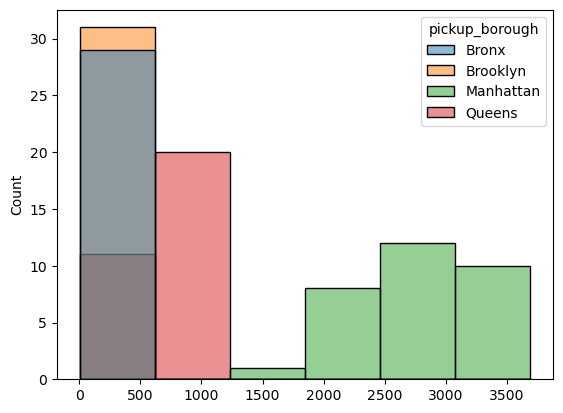

In [31]:
sns.histplot(data=borough_pivot, bins=6);

With the help of seaborn, we will display histograms of the amount of monthly payments by car color ('color' column)

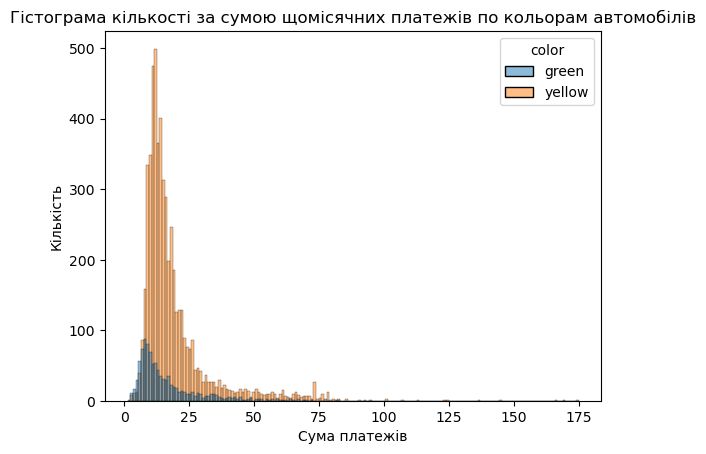

In [32]:
sns.histplot(x='total', hue='color', data=df_taxi_clean.sort_values('color'));

plt.title('Гістограма кількості за сумою щомісячних платежів по кольорам автомобілів')
plt.xlabel('Сума платежів')
plt.ylabel('Кількість')

plt.show()

I wonder if there is a relationship between the distance of the trip and the size of the tip? Let's build a scatter diagram between the distance of the trip and the size of the tip.

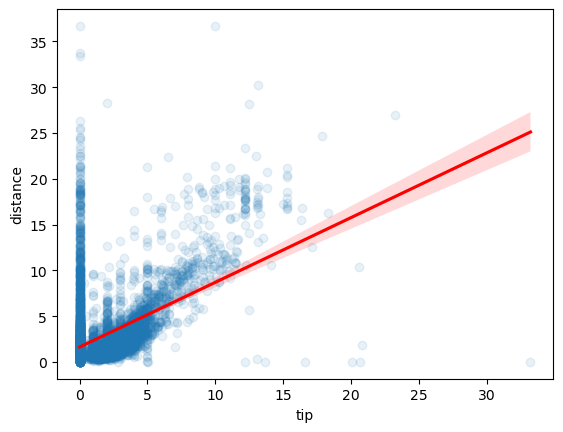

In [33]:
sns.regplot(x='tip', y='distance', data=df_taxi_clean, scatter_kws={'alpha':0.1}, line_kws={'color':'red'});

Since the trend line is directed upwards, the trend is positive, because we will see that as the distance of the trip increases, the size of the tip also increases.

We will build the daily dynamics of tips in the areas where the passenger was picked up

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x1000 with 0 Axes>

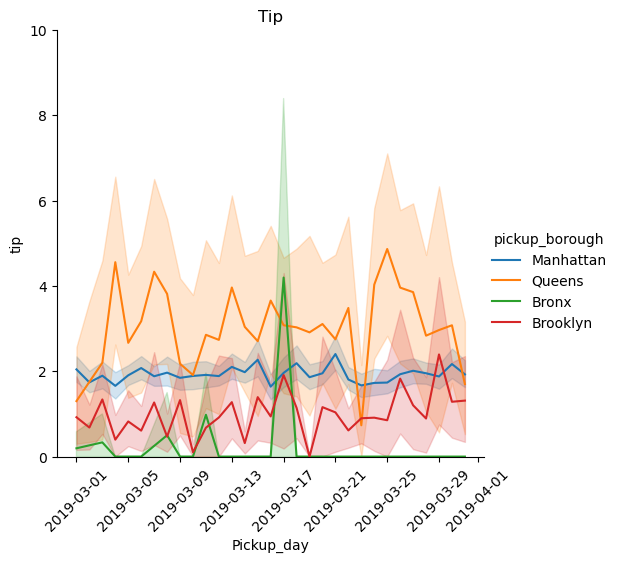

In [36]:
df_taxi_filtered = df_taxi_clean[df_taxi_clean.pickup_borough!='NA']

plt.figure(figsize=(8, 10))

sns.relplot(x='pickup_day', y='tip', hue='pickup_borough', kind='line', data=df_taxi_filtered);

plt.ylim(0, 10)

plt.title('Tip')
plt.xlabel('Pickup_day')
plt.xticks(rotation=45)

plt.show()

Let's build a box-plot of the size of the tip by district (all districts, except ``NA'') of the start of the trip.

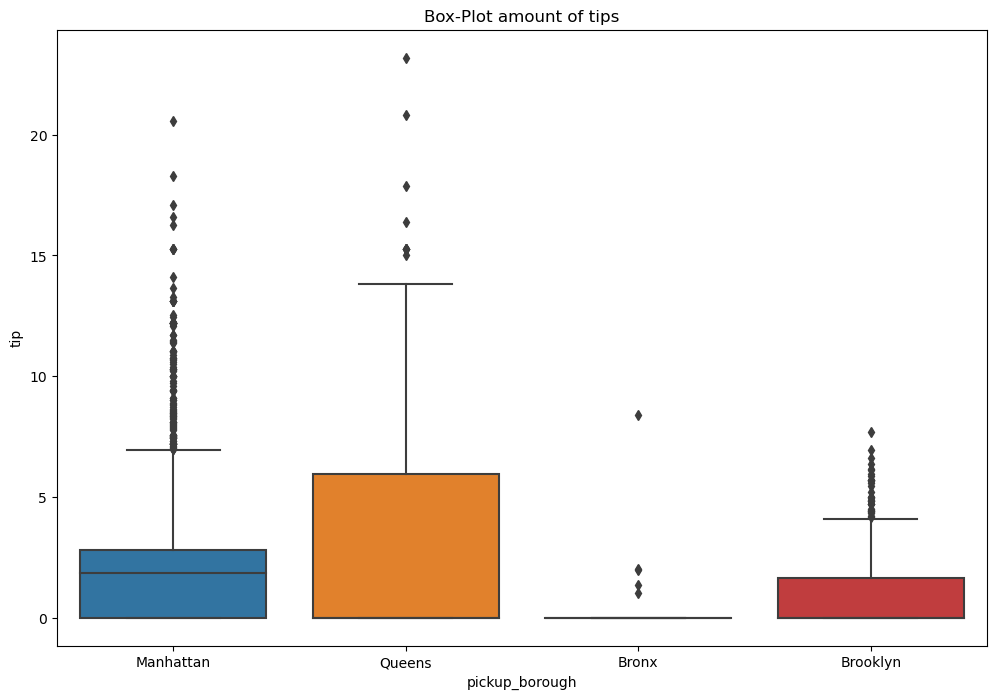

In [38]:
df_selected = df_taxi_clean[df_taxi_clean.pickup_borough!='NA']

plt.figure(figsize=(12, 8))
sns.boxplot(x='pickup_borough', y='tip', data=df_selected)

plt.title('Box-Plot amount of tips')
plt.xlabel('pickup_borough')
plt.ylabel('tip')

plt.show()

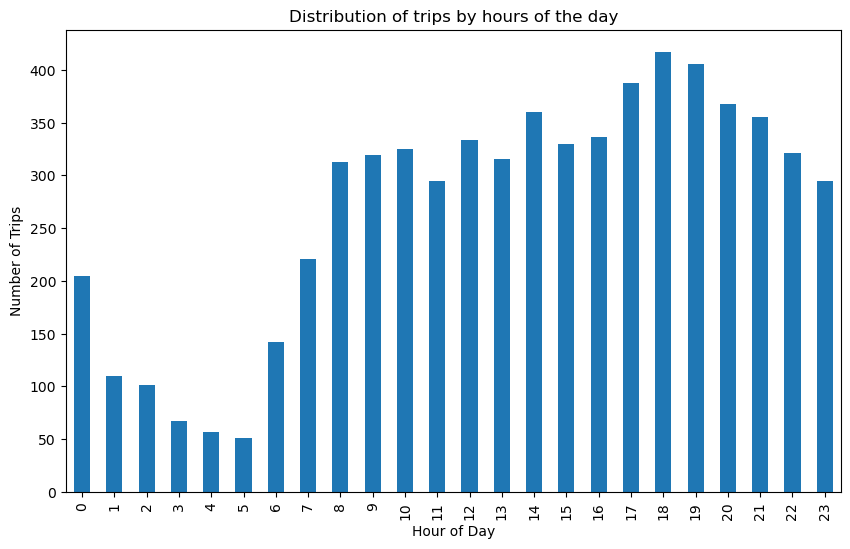

In [39]:
# This can help to understand when the demand for taxis is the highest and how the availability of transport can be optimized.

df_taxi_clean['pickup'] = pd.to_datetime(df_taxi_clean['pickup'])
df_taxi_clean['hour'] = df_taxi_clean['pickup'].dt.hour

df_taxi_clean.groupby('hour').size().plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of trips by hours of the day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.show()

# We see the largest number of trips from 5 to 9 p.m., at this time a larger number of available cars may be needed for ordering

How are trips distributed by time of day?

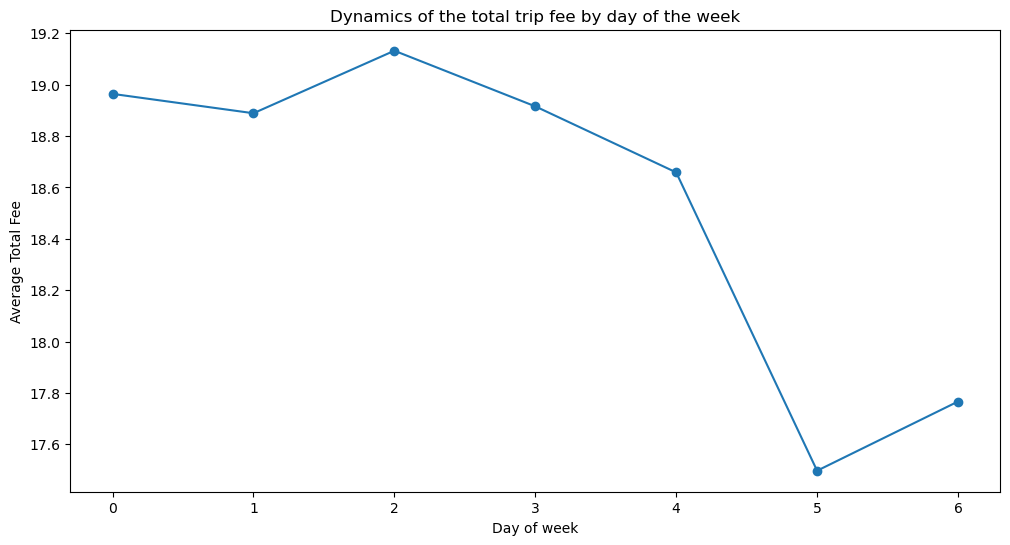

In [42]:
# Total payment for a trip by day of the week:
df_taxi_clean['day_of_week'] = df_taxi_clean['pickup'].dt.dayofweek
df_taxi_clean.groupby('day_of_week')['total'].mean().plot(kind='line', marker='o', figsize=(12, 6));

plt.title('Dynamics of the total trip fee by day of the week')
plt.xlabel('Day of week')
plt.ylabel('Average Total Fee')
plt.show()

We can find out how the total fare for the trip changes on different days of the week. In this case, we see that the most payments are made on weekdays, and there are fewer orders on weekends